# Africa Economic, Banking & Systematic Crisis Data - Visualization Study

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/african_crises.csv")
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
unique_countries = data.country.unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

# Year wise average usd exchange rate of each country

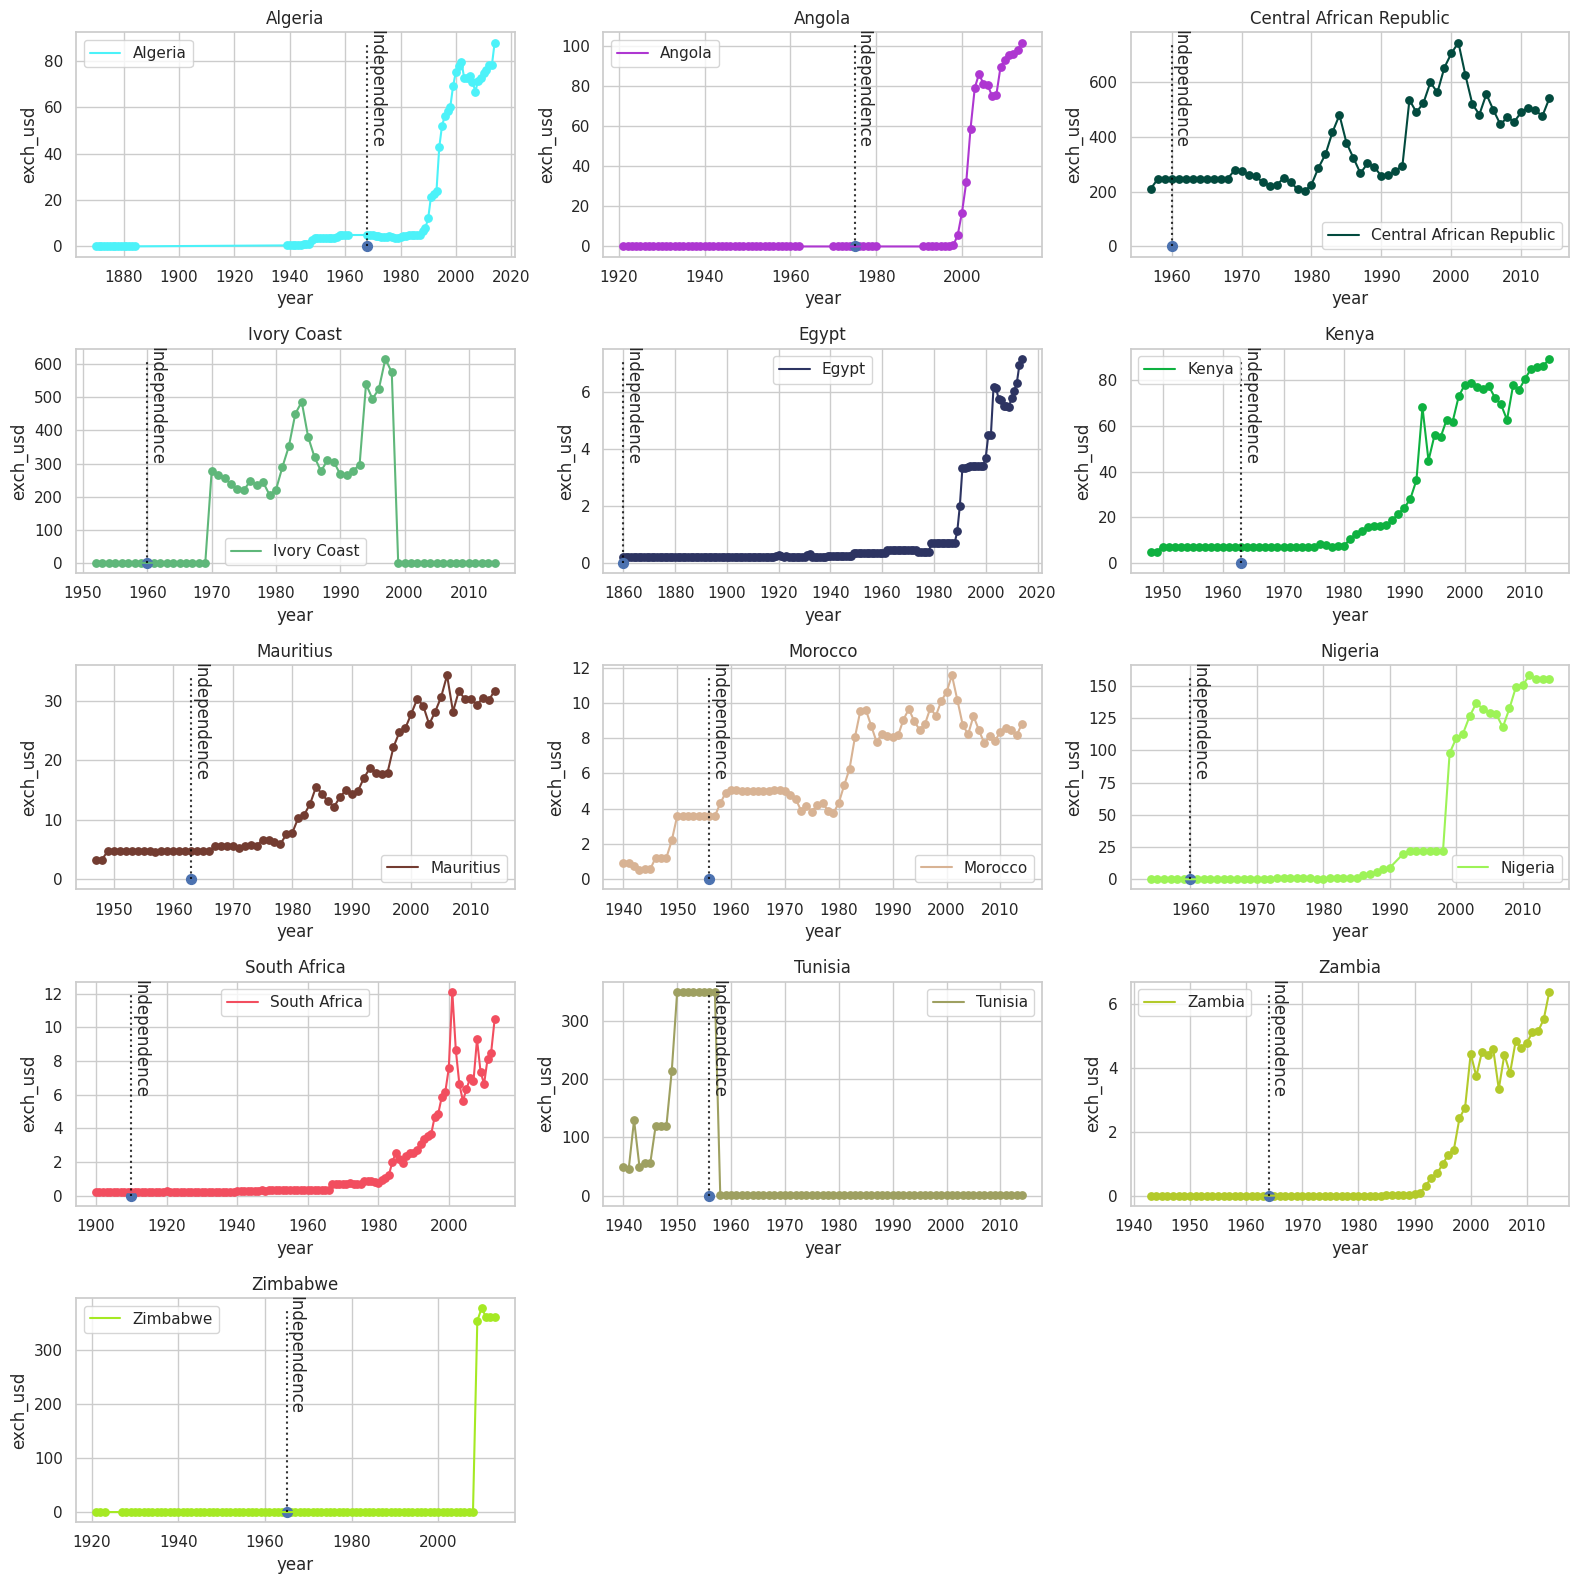

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set(style='whitegrid')
plt.figure(figsize=(16,16))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(x=data[data.country == country]['year'],
                 y=data[data.country == country]['exch_usd'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [0,
              np.max(data[data.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

# Different debt count of each country

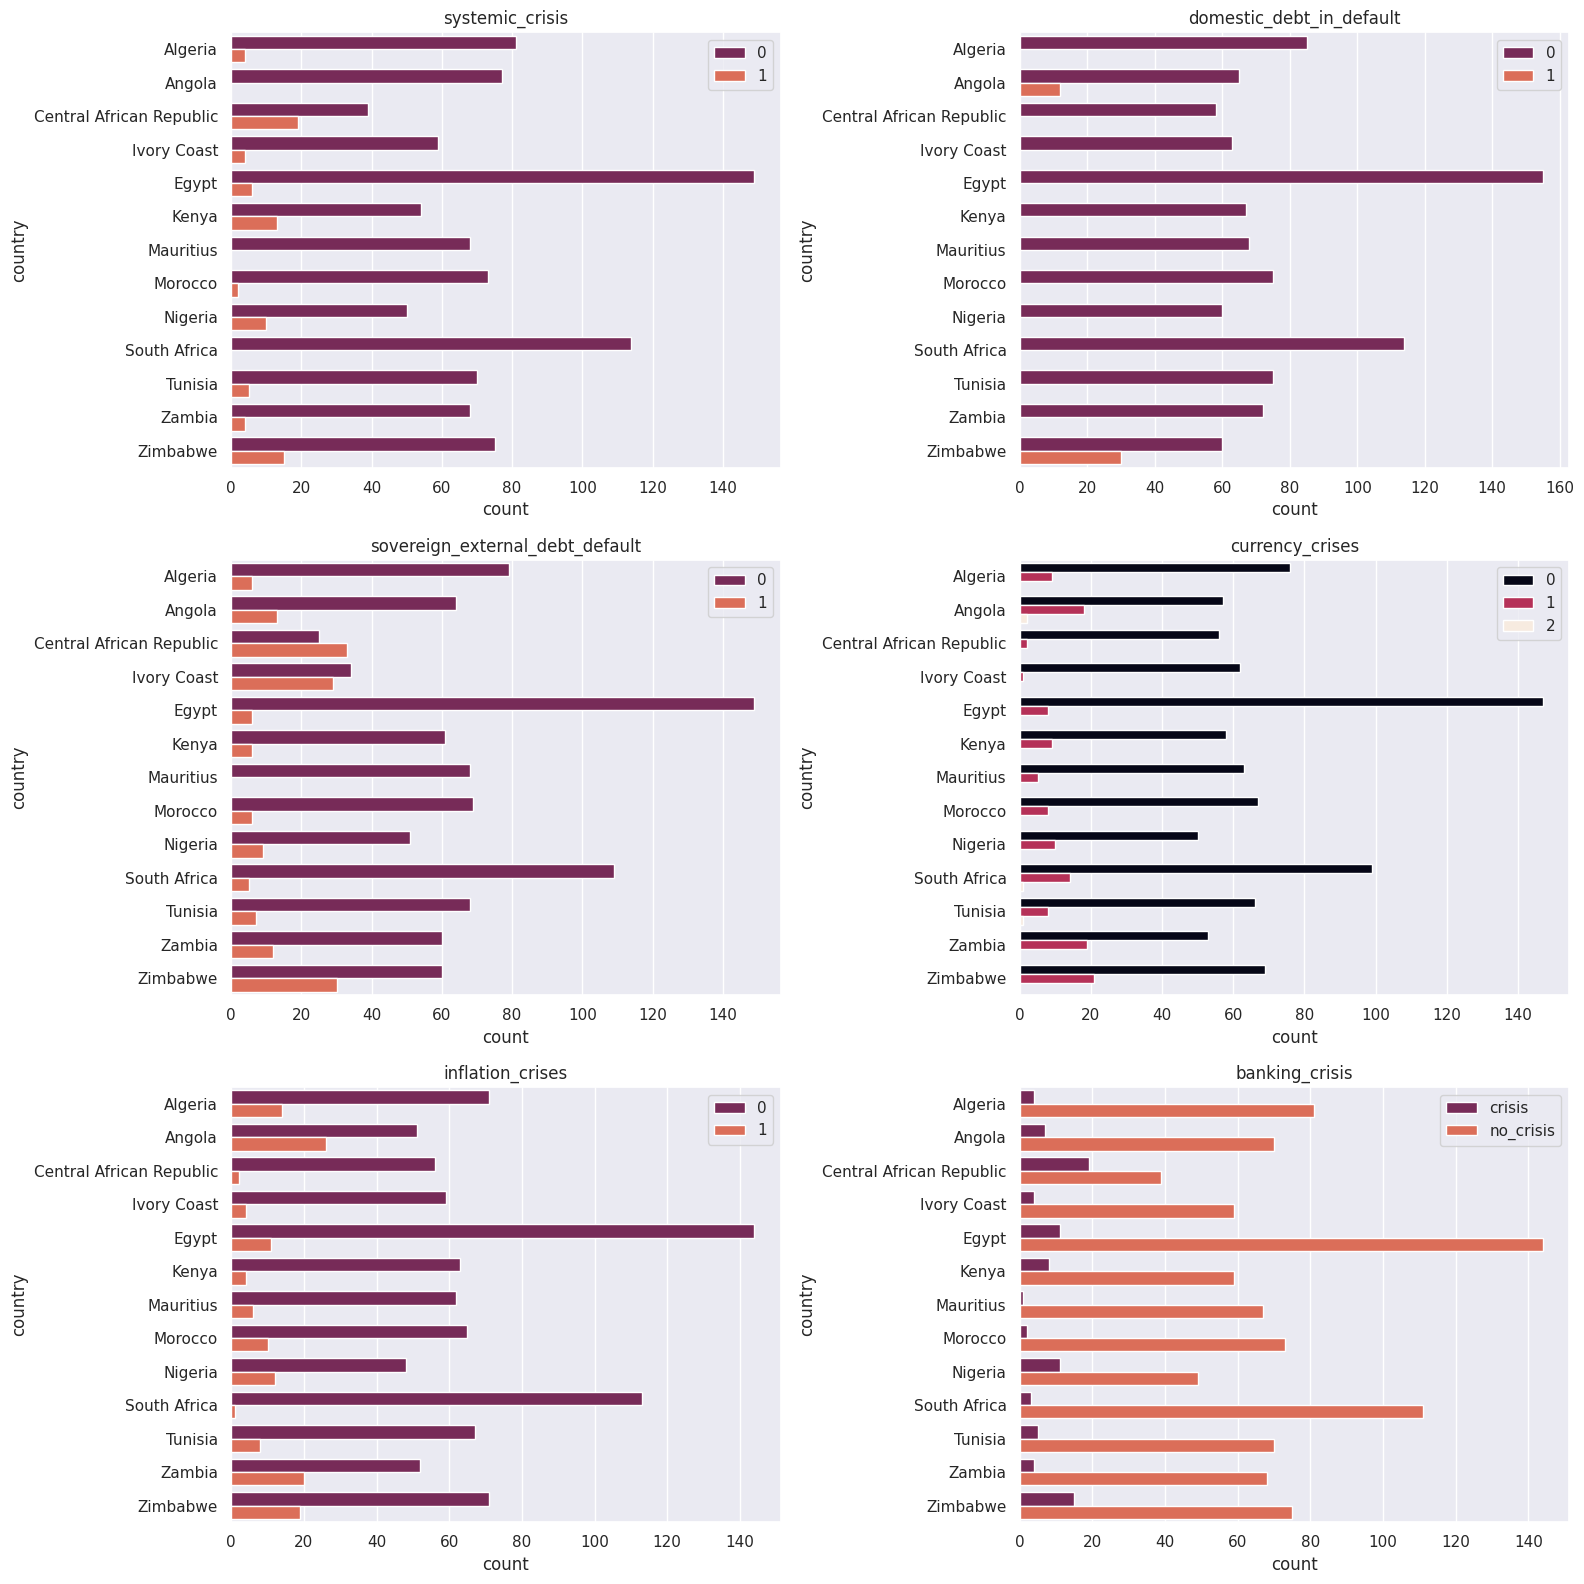

In [7]:
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(16,16))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=data.country,hue=data[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

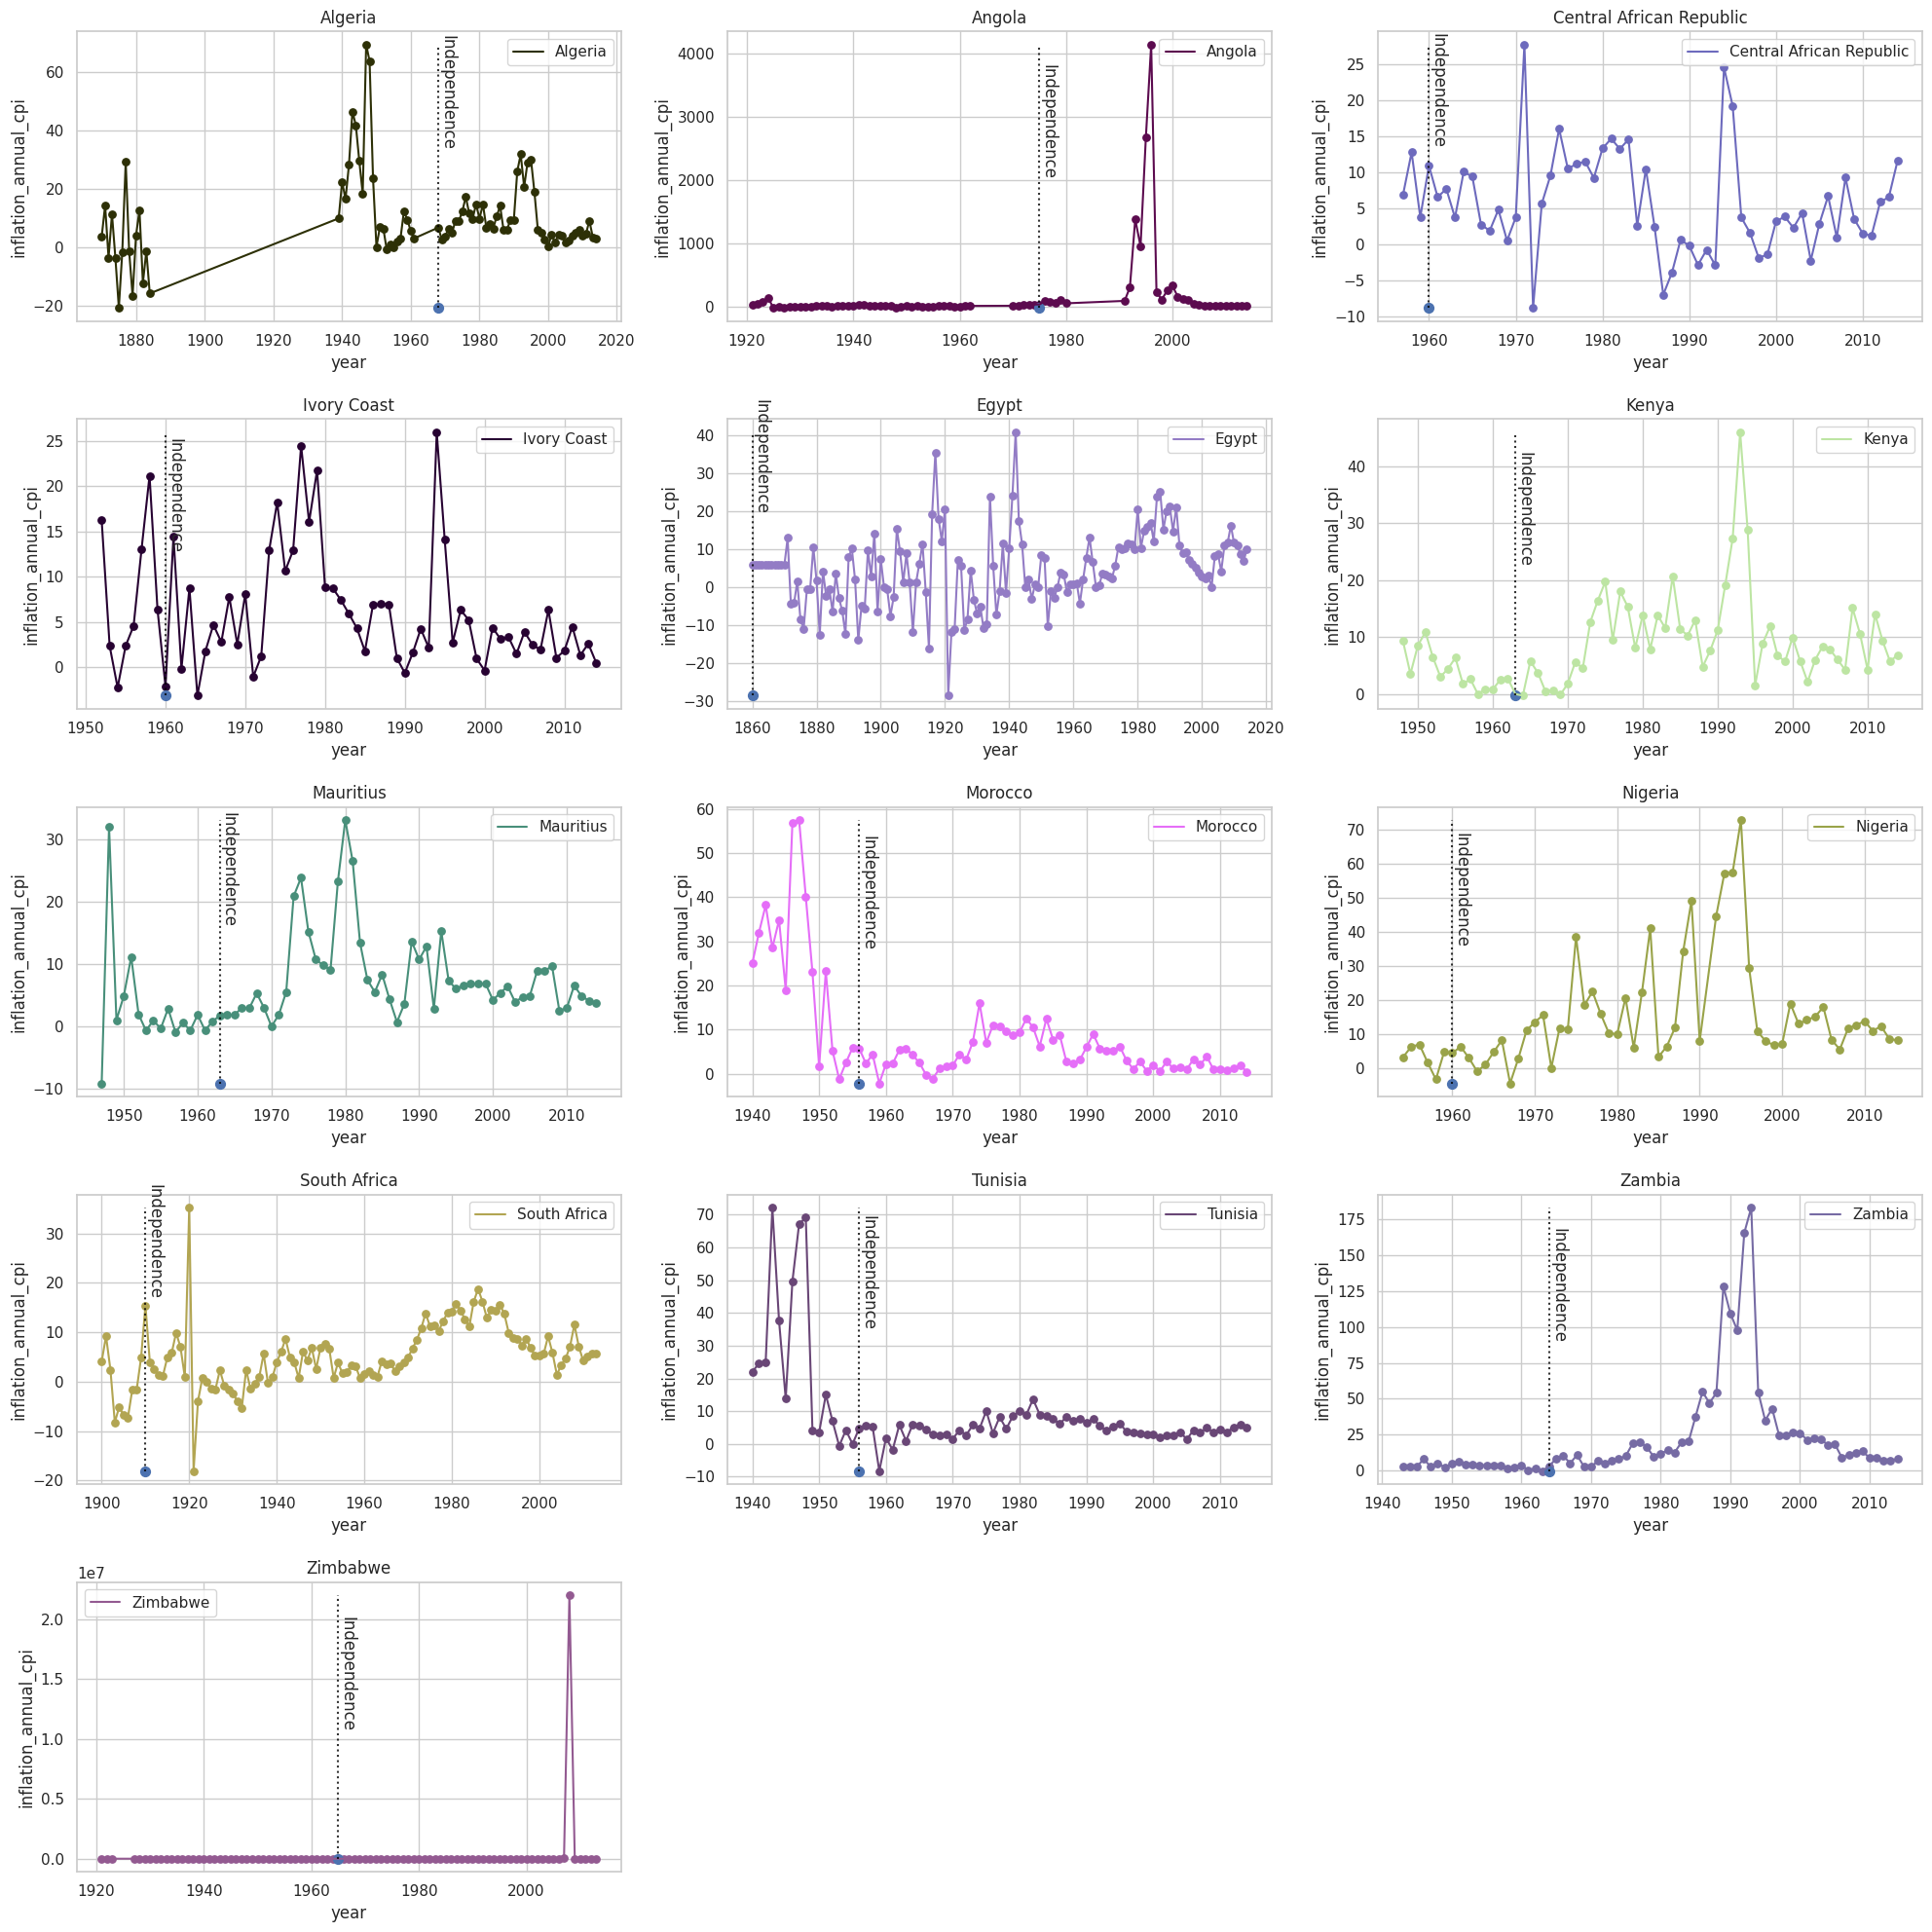

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(x = data[data.country==country]['year'],
                 y = data[data.country==country]['inflation_annual_cpi'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['inflation_annual_cpi'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [np.min(data[data.country==country]['inflation_annual_cpi']),
              np.max(data[data.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=np.min(data[data.country==country]['inflation_annual_cpi']),
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

<Axes: >

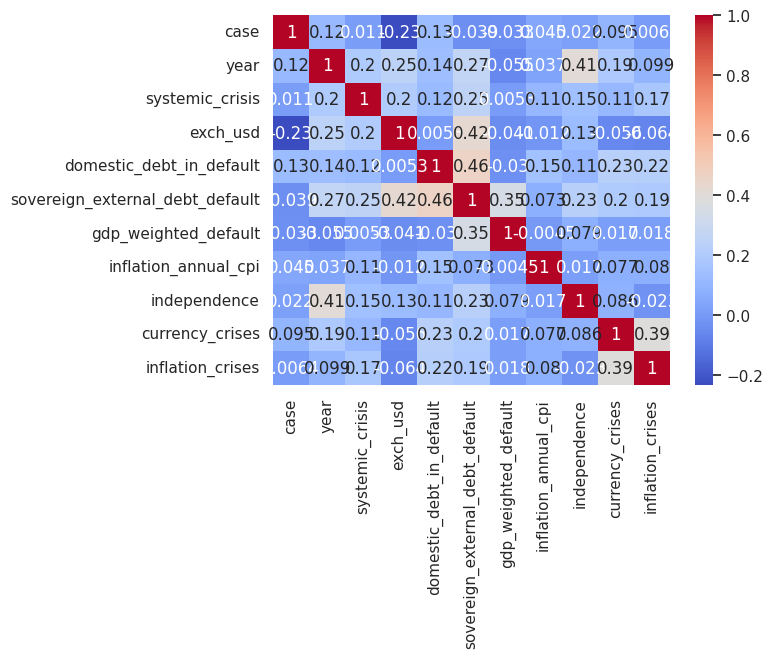

In [14]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')